## IBM HR Analytics Employee Attrition & Performance
##### Predict attrition of valuable employees


In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing IBM HR datasets
HRdata = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
HRdata.head(5).transpose()

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [5]:
# Let's check the dimensions of the dataframe
HRdata.shape

(1470, 35)

In [6]:
# Let's see the type of each column
HRdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [7]:
# summarising number of missing values in each column
HRdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# percentage of missing values in each column
round(HRdata.isnull().sum()/len(HRdata.index), 2)*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [9]:
# missing values in rows
HRdata.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    0
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    0
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
Length: 1470, dtype: int64

In [10]:
# checking whether some rows have more than 5 missing values
len(HRdata[HRdata.isnull().sum(axis=1) > 5].index)

0

In [11]:
#checking for redundant duplicate rows
print(sum(HRdata.duplicated()))
#Dropping Duplicate Rows
HRdata.drop_duplicates(keep=False,inplace=True)
print(sum(HRdata.duplicated()))

0
0


###The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [12]:
# Get the value counts of all the columns

for column in HRdata:
    print(HRdata[column].astype('category').value_counts())
    print('___________________________________________________')

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
___________________________________________________
No     1233
Yes     237
Name: Attrition, dtype: int64
___________________________________________________
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
___________________________________________________
691     6
1082    5
329     5
1329    5
530     5
408     5
715     4
589     4
906     4
350     4
827     4
1146    4
1283    4
829     4
688     4
1125    4
430     4
465     4
575     4
147     4
217     4
933     4
117     4
427     4
1490    4
977     4
921   

In [13]:
#dropping columns having single value - EmployeeCount, StandardHours, Over18 
HRdata.drop(['EmployeeCount','Over18','StandardHours'], axis = 1, inplace = True)

In [14]:
# let's look at the statistical aspects of the numeric features in dataframe
HRdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# let's look at the outliers for numeric features in dataframe
HRdata.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,50.0,54.00,58.31,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1356.0,1424.10,1485.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,23.0,26.00,29.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,4.0,4.00,5.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,1857.1,1967.55,2046.62,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0,4.00,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,94.0,97.00,100.00,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,3.0,4.00,4.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,4.0,4.00,5.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0,4.00,4.00,4.0


#### Performing outlier treatment for numeric values showing huge spread from above percentile table

In [16]:
# Outlier treatment for Age 
Q1 = HRdata.Age.quantile(0.25)
Q3 = HRdata.Age.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.Age >= Q1 - 1.5*IQR) & (HRdata.Age <= Q3 + 1.5*IQR)]
# Outlier treatment for DailyRate 
Q1 = HRdata.DailyRate.quantile(0.25)
Q3 = HRdata.DailyRate.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.DailyRate >= Q1 - 1.5*IQR) & (HRdata.DailyRate <= Q3 + 1.5*IQR)]
# Outlier treatment for HourlyRate 
Q1 = HRdata.HourlyRate.quantile(0.25)
Q3 = HRdata.HourlyRate.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.HourlyRate >= Q1 - 1.5*IQR) & (HRdata.HourlyRate <= Q3 + 1.5*IQR)]
# Outlier treatment for TotalWorkingYears
Q1 = HRdata.TotalWorkingYears.quantile(0.25)
Q3 = HRdata.TotalWorkingYears.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.TotalWorkingYears >= Q1 - 1.5*IQR) & (HRdata.TotalWorkingYears <= Q3 + 1.5*IQR)]
# Outlier treatment for YearsAtCompany 
Q1 = HRdata.YearsAtCompany.quantile(0.25)
Q3 = HRdata.YearsAtCompany.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.YearsAtCompany >= Q1 - 1.5*IQR) & (HRdata.YearsAtCompany <= Q3 + 1.5*IQR)]
# Outlier treatment for YearsInCurrentRole 
Q1 = HRdata.YearsInCurrentRole.quantile(0.25)
Q3 = HRdata.YearsInCurrentRole.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.YearsInCurrentRole >= Q1 - 1.5*IQR) & (HRdata.YearsInCurrentRole <= Q3 + 1.5*IQR)]
# Outlier treatment for YearsSinceLastPromotion 
Q1 = HRdata.YearsSinceLastPromotion.quantile(0.25)
Q3 = HRdata.YearsSinceLastPromotion.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.YearsSinceLastPromotion >= Q1 - 1.5*IQR) & (HRdata.YearsSinceLastPromotion <= Q3 + 1.5*IQR)]
# Outlier treatment for YearsWithCurrManager 
Q1 = HRdata.YearsWithCurrManager.quantile(0.25)
Q3 = HRdata.YearsWithCurrManager.quantile(0.75)
IQR = Q3 - Q1
HRdata = HRdata[(HRdata.YearsWithCurrManager >= Q1 - 1.5*IQR) & (HRdata.YearsWithCurrManager <= Q3 + 1.5*IQR)]

### Performing Exploratory Data Analysis to Derive Insights

#### Plotting Correlation between numeric variables

In [17]:
# correlation matrix
cor = HRdata.corr()
cor

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.025557,0.003717,0.235025,-0.009580,0.002784,0.034204,0.041827,0.414742,0.008474,0.405126,0.023455,0.322552,0.008470,-0.001809,0.041334,0.061019,0.610351,-0.003347,-0.012224,0.110337,0.090292,0.073749,0.075528
DailyRate,0.025557,1.000000,-0.007825,-0.016975,-0.048195,0.041530,0.037283,0.056398,0.019445,0.048664,0.029897,-0.013997,0.048186,0.023945,-0.010687,-0.002101,0.054726,0.056013,0.005021,-0.061419,0.031306,0.035276,-0.000870,0.018915
DistanceFromHome,0.003717,-0.007825,1.000000,-0.023479,0.023455,-0.021391,0.003272,-0.014837,0.043921,-0.008284,0.018139,0.034699,-0.016150,0.041664,0.027983,-0.004048,0.053766,0.025382,-0.025097,-0.045676,0.008199,0.017538,-0.003905,0.003069
Education,0.235025,-0.016975,-0.023479,1.000000,0.054445,-0.025998,0.000210,0.038760,0.102773,-0.011807,0.106592,-0.034693,0.145520,-0.005072,-0.027860,-0.004920,0.033447,0.148326,-0.014685,0.020851,0.029696,0.038202,-0.002920,0.003096
EmployeeNumber,-0.009580,-0.048195,0.023455,0.054445,1.000000,0.005588,0.029432,-0.014576,-0.001874,-0.047311,-0.004565,-0.006720,0.006715,-0.034752,-0.031904,-0.058367,0.066687,-0.005063,0.005077,0.011526,0.015560,-0.012955,0.010224,-0.007404
EnvironmentSatisfaction,0.002784,0.041530,-0.021391,-0.025998,0.005588,1.000000,-0.033851,0.002016,0.020469,-0.020212,0.000054,0.036916,0.013342,-0.026844,-0.017506,0.035603,0.026722,-0.026398,0.008583,0.043450,0.037965,0.047500,0.054816,0.025854
HourlyRate,0.034204,0.037283,0.003272,0.000210,0.029432,-0.033851,1.000000,0.049958,-0.023049,-0.070433,-0.010443,-0.024922,0.005817,-0.023928,0.002294,0.005466,0.028537,0.003132,-0.009128,-0.006796,-0.034249,-0.044748,-0.053630,-0.026679
JobInvolvement,0.041827,0.056398,-0.014837,0.038760,-0.014576,0.002016,0.049958,1.000000,0.018289,0.000316,0.008794,0.000244,0.003524,-0.010865,-0.010974,0.019074,-0.009314,0.027807,0.001799,-0.010885,0.041427,0.020672,0.007924,0.053398
JobLevel,0.414742,0.019445,0.043921,0.102773,-0.001874,0.020469,-0.023049,0.018289,1.000000,-0.004859,0.928718,0.044292,0.182220,-0.035660,-0.033716,0.008965,0.028649,0.714412,-0.002411,0.048415,0.271236,0.234251,0.109672,0.213331
JobSatisfaction,0.008474,0.048664,-0.008284,-0.011807,-0.047311,-0.020212,-0.070433,0.000316,-0.004859,1.000000,-0.002305,-0.027533,-0.049719,0.013877,-0.000871,0.018857,0.014870,-0.003317,-0.006307,-0.016644,0.053177,0.030935,0.041470,0.020893


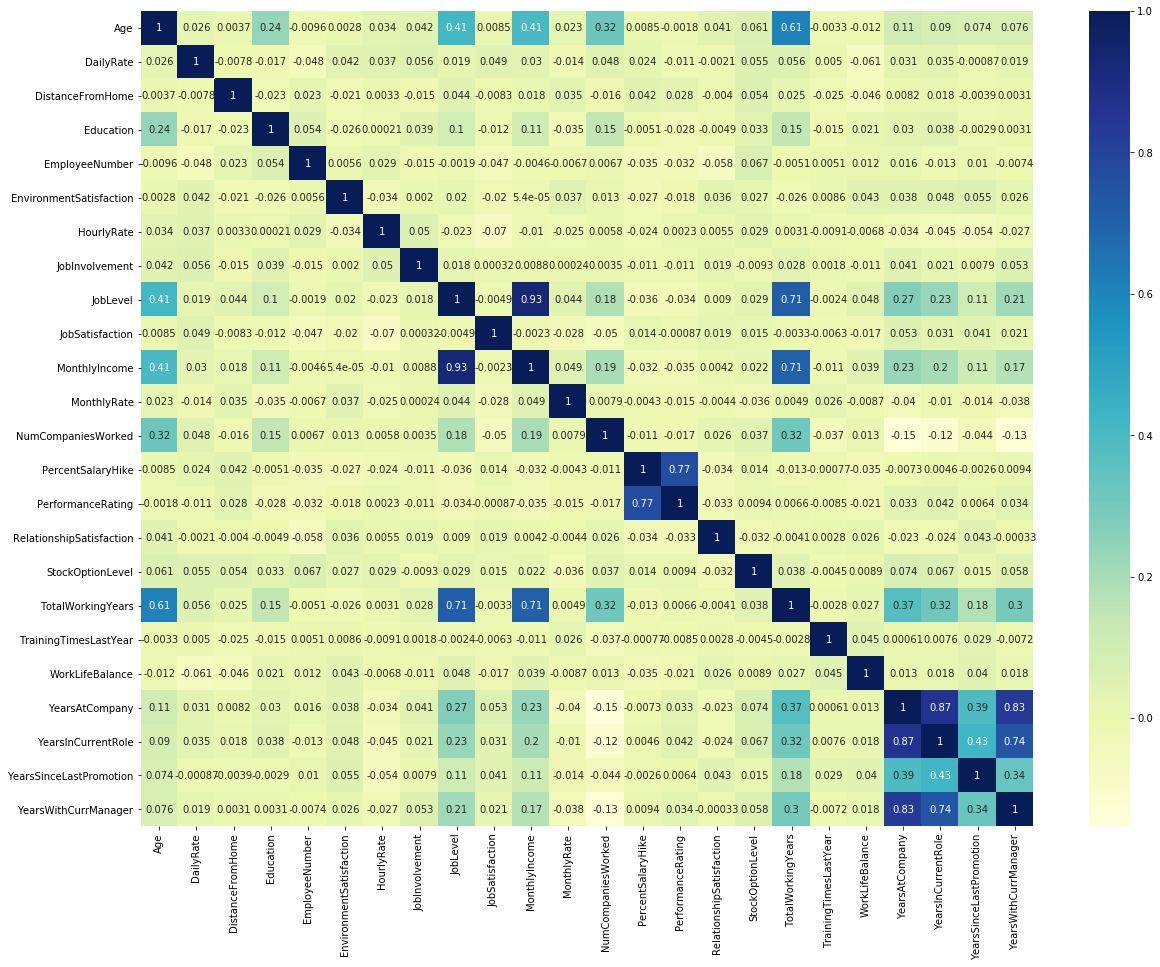

In [18]:
# Plotting correlations on a heatmap post outlier treatment
# figure size
plt.figure(figsize=(20,15))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### From the correlation matrix and heatmaps we can clearly see there is a good correlation between few variables:¶
Years at Company, Years in Current Role, Years with Current Manager, Years since last promotion, Total Working Years, Job Level, Monthly Income, Performance Rating, Percent Salary Hike, Monthly Income

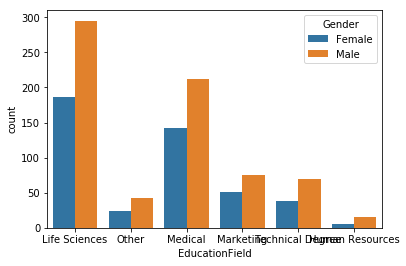

In [19]:
# Plotting count of EducationField vs. Gender
sns.countplot(x = "EducationField", hue = "Gender", data = HRdata)

In [20]:
HRdata.shape

(1158, 32)

#### 32 features and 1158 records

#### Data Preparation for Categorical Variables

#### For Binary Yes/No variables, converting to 1/0

In [21]:
# List of binary variables with Yes/No values using map converting these to 1/0
varlist =  ['OverTime','Attrition']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the leads score list
HRdata[varlist] = HRdata[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [22]:
# Creating a dummy variable for the multilevel categorical variables and dropping the first one to remove redundancy.
dummy1 = pd.get_dummies(HRdata[['Gender','JobRole', 'EducationField', 'Department','MaritalStatus','BusinessTravel']], drop_first=True)

# Adding the results to the master dataframe
HRdata = pd.concat([HRdata, dummy1], axis=1)

In [23]:
# Dropping the repeated variables as we have created dummies for the below variables
HRdata = HRdata.drop(['Gender','JobRole', 'EducationField', 'Department','MaritalStatus','BusinessTravel'], 1)

In [24]:
print(HRdata.shape)
HRdata.head()

(1158, 46)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1


In [25]:
# Rechecking if all the levels of all the columns are OK (without any NaN or error)
for column in HRdata:
    print(HRdata[column].astype('category').value_counts())
    print('___________________________________________________')

29    65
35    63
34    62
31    58
36    54
32    53
30    50
33    49
38    48
28    46
27    45
37    42
40    37
26    35
42    33
45    29
39    28
46    27
25    26
24    26
41    26
43    24
44    22
49    19
50    17
22    16
23    14
47    13
48    13
21    13
51    12
54    11
20    11
53    10
19     9
18     8
52     8
55     8
56     8
59     7
58     7
57     3
60     3
Name: Age, dtype: int64
___________________________________________________
0    961
1    197
Name: Attrition, dtype: int64
___________________________________________________
1329    5
691     5
329     5
575     4
1146    4
430     4
827     4
589     4
408     4
1283    4
977     4
1082    4
688     4
1469    4
906     3
1206    3
622     3
548     3
1176    3
1229    3
746     3
1169    3
265     3
571     3
715     3
896     3
1240    3
895     3
703     3
217     3
       ..
867     1
866     1
862     1
848     1
879     1
845     1
841     1
835     1
832     1
830     1
828     1
874     1
883    

### Test-Train Split

In [26]:
from sklearn.model_selection import train_test_split
# Putting feature variables to X by first dropping y (Attrition) from HRdata
X = HRdata.drop(['Attrition'], axis=1)
# Putting response variable to y
y = HRdata['Attrition']
print(y.head())

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


In [27]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [28]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Department_Research & Developm

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']] = scaler.fit_transform(X_train[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']])

#verifying the scaled data in X_train dataframe
X_train.describe()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
count,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02,8.100000e+02
mean,2.887951e-16,3.728156e-17,-1.094803e-16,9.466022e-17,-1.163678e-16,-1.644775e-16,1.101999e-16,-7.264422e-17,-5.770418e-17,1.754427e-16,-2.083381e-17,7.785268e-17,-9.046262e-17,4.128385e-16,1.780469e-16,-2.062822e-17,1.215077e-16,-2.398630e-16,-4.440892e-17,2.658025e-16,2.124501e-16,-3.125072e-17,2.689207e-16,-4.057111e-17,-2.494575e-17,3.892634e-17,-1.666020e-16,1.699601e-16,-3.940606e-17,4.824673e-17,1.354883e-16,1.940834e-16,1.554312e-16,1.563907e-16,-4.166763e-17,1.768133e-17,1.559795e-16,3.104513e-16,-3.119590e-16,-5.477100e-16,-1.326785e-16,4.386066e-18,8.772133e-18,-1.881897e-16,-3.618505e-17
std,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00,1.000618e+00
min,-2.010665e+00,-1.752910e+00,-1.041146e+00,-1.861367e+00,-1.711043e+00,-1.571634e+00,-1.785800e+00,-2.419673e+00,-8.683569e-01,-1.598094e+00,-1.178434e+00,-1.695619e+00,-1.092340e+00,-6.182658e-01,-1.165008e+00,-4.491998e-01,-1.607433e+00,-9.300702e-01,-1.558618e+00,-2.143193e+00,-2.518668e+00,-1.409630e+00,-1.095761e+00,-7.688884e-01,-1.113000e+00,-1.253566e+00,-2.218621e-01,-5.134691e-01,-1.670891e-01,-3.194383e-01,-2.028081e-01,-5.287919e-01,-5.287919e-01,-2.777187e-01,-8.440815e-01,-3.468890e-01,-6.623603e-01,-2.425356e-01,-3.241107e-01,-1.372065e+00,-6.508073e-01,-8.833005e-01,-7.130076e-01,-4.747800e-01,-1.607505e+00
25%,-7.427037e-01,-8.426255e-01,-9.168349e-01,-8.765810e-01,-8.755595e-01,-6.597259e-01,-8.469328e-01,-1.018719e+00,-8.683569e-01,-6.871465e-01,-7.113339e-01,-8.851082e-01,-6.759657e-01,-6.182658e-01,-8.929826e-01,-4.491998e-01,-6.720734e-01,-9.300702e-01,-6.857747e-01,-6.401745e-01,-1.112658e+00,-8.357166e-01,-7.509413e-01,-7.688884e-01,-7.515204e-01,-1.253566e+00,-2.218621e-01,-5.134691e-01,-1.670891e-01,-3.194383e-01,-2.028081e-01,-5.287919e-01,-5.287919e-01,-2.777187e-01,-8.440815e-01,-3.468890e-01,-6.623603e-01,-2.425356e-01,-3.241107e-01,-1.372065e+00,-6.508073e-01,-8.833005e-01,-7.130076e-01,-4.747800e-01,-1.607505e+00
50%,-1.663577e-01,-3.369117e-03,-2.33

In [30]:
### Before we build the Logistic regression model, we need to know how much percent of attrition is seen in the original data
### Calculating the Attrition Rate
AttritionRate = round((sum(HRdata['Attrition'])/len(HRdata['Attrition'].index))*100,2)
AttritionRate

17.01

### Model Building

In [31]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  810
Model:                            GLM   Df Residuals:                      764
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -214.98
Date:                Thu, 11 Apr 2019   Deviance:                       429.95
Time:                        12:11:43   Pearson chi2:                 2.68e+03
No. Iterations:                    23   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.2533    989.405     -0.004      0.997   -1943.451    1934.944
Age                                  -0.4033      0.175     -2.306      0.021      -0.746      -0.061
DailyRate                            -0.0764      0.130     -0.589      0.556      -0.331       0.178
DistanceFromHome                      0.4420      0.124      3.569      0.000       0.199       0.685
Education                             0.0467      0.131      0.356      0.722      -0.211       0.304
EmployeeNumber                       -0.1822      0.133     -1.366      0.172      -0.444       0.079
EnvironmentSatisfaction              -0.7554      0.140     -5.408      0.000      -1.029      -0.482
HourlyRate                            0.1281      0.132      0.970      0.332      -0.131       0.387
JobInvolvement                       -0.2762      0.120     -2.302      0.021      -0.511      -0.041
JobLevel                              0.1494      0.461      0.324      0.746      -0.755       1.054
JobSatisfaction                      -0.6921      0.133     -5.196      0.000      -0.953      -0.431
MonthlyIncome                         0.1958      0.469      0.418      0.676      -0.723       1.115
MonthlyRate                           0.2143      0.131      1.642      0.101      -0.042       0.470
NumCompaniesWorked                    0.4671      0.144      3.243      0.001       0.185       0.749
OverTime                              0.8508      0.126      6.741      0.000       0.603       1.098
PercentSalaryHike                    -0.1924      0.214     -0.899      0.369      -0.612       0.227
PerformanceRating                     0.2643      0.217      1.220      0.222      -0.160       0.689
RelationshipSatisfaction             -0.3549      0.132     -2.695      0.007      -0.613      -0.097
StockOptionLevel                     -0.1330      0.196     -0.678      0.498      -0.518       0.251
TotalWorkingYears                    -0.3630      0.261     -1.389      0.165      -0.875       0.149
TrainingTimesLastYear                -0.3128      0.134     -2.326      0.020      -0.576      -0.049
WorkLifeBalance                      -0.2468      0.127     -1.951      0.051      -0.495       0.001
YearsAtCompany                        0.5556      0.348      1.597      0.110      -0.126       1.238
YearsInCurrentRole                   -0.7003      0.295     -2.373      0.018      -1.279      -0.122
YearsSinceLastPromotion               0.1117      0.167      0.670      0.503      -0.215       0.438
YearsWithCurrManager                 -0.6776      0.258     -2.631      0.009      -1.182      -0.173
Gender_Male                           0.2415      0.131      1.847      0.065      -0.015       0.498
JobRole_Human Resources              -0.0015   1.89e+04  -8.09e-08      1.000   -3.71e+04    3.71e+04


### Feature Selection Using RFE

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [33]:
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('DailyRate', False, 20),
 ('DistanceFromHome', True, 1),
 ('Education', False, 22),
 ('EmployeeNumber', False, 14),
 ('EnvironmentSatisfaction', True, 1),
 ('HourlyRate', False, 17),
 ('JobInvolvement', False, 4),
 ('JobLevel', False, 19),
 ('JobSatisfaction', True, 1),
 ('MonthlyIncome', False, 15),
 ('MonthlyRate', False, 8),
 ('NumCompaniesWorked', True, 1),
 ('OverTime', True, 1),
 ('PercentSalaryHike', False, 10),
 ('PerformanceRating', False, 9),
 ('RelationshipSatisfaction', True, 1),
 ('StockOptionLevel', False, 6),
 ('TotalWorkingYears', False, 2),
 ('TrainingTimesLastYear', True, 1),
 ('WorkLifeBalance', False, 5),
 ('YearsAtCompany', True, 1),
 ('YearsInCurrentRole', True, 1),
 ('YearsSinceLastPromotion', False, 18),
 ('YearsWithCurrManager', True, 1),
 ('Gender_Male', False, 7),
 ('JobRole_Human Resources', False, 16),
 ('JobRole_Laboratory Technician', True, 1),
 ('JobRole_Manager', True, 1),
 ('JobRole_Manufacturing Director', False, 26),
 ('JobRole_R

In [34]:
col = X_train.columns[rfe.support_]

In [35]:
X_train.columns[~rfe.support_]

Index(['DailyRate', 'Education', 'EmployeeNumber', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Manufacturing Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Married',
       'BusinessTravel_Travel_Rarely'],
      dtype='object')

### Assessing the model with StatsModel

In [36]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  810
Model:                            GLM   Df Residuals:                      789
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.13
Date:                Thu, 11 Apr 2019   Deviance:                       458.25
Time:                        12:11:43   Pearson chi2:                 1.74e+03
No. Iterations:                    23   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.0460    994.122     -0.004      0.997   -1952.489    1944.397
Age                                 -0.4613      0.142     -3.239      0.001      -0.740      -0.182
DistanceFromHome                     0.3953      0.115      3.447      0.001       0.171       0.620
EnvironmentSatisfaction             -0.7128      0.130     -5.474      0.000      -0.968      -0.458
JobSatisfaction                     -0.6435      0.125     -5.136      0.000      -0.889      -0.398
NumCompaniesWorked                   0.3558      0.128      2.787      0.005       0.106       0.606
OverTime                             0.7989      0.118      6.767      0.000       0.568       1.030
RelationshipSatisfaction            -0.3144      0.123     -2.566      0.010      -0.555      -0.074
TrainingTimesLastYear               -0.3147      0.128     -2.451      0.014      -0.566      -0.063
YearsAtCompany                       0.3880      0.316      1.229      0.219      -0.231       1.007
YearsInCurrentRole                  -0.5316      0.270     -1.970      0.049      -1.061      -0.003
YearsWithCurrManager                -0.6898      0.240     -2.877      0.004      -1.160      -0.220
JobRole_Laboratory Technician        0.3646      0.118      3.080      0.002       0.133       0.597
JobRole_Manager                     -3.5992   3976.564     -0.001      0.999   -7797.522    7790.323
JobRole_Research Director           -4.5123   3646.093     -0.001      0.999   -7150.722    7141.698
JobRole_Sales Representative         0.3730      0.103      3.632      0.000       0.172       0.574
EducationField_Life Sciences        -0.4332      0.156     -2.771      0.006      -0.740      -0.127
EducationField_Medical              -0.3878      0.156     -2.492      0.013      -0.693      -0.083
EducationField_Other                -0.3632      0.156     -2.329      0.020      -0.669      -0.058
MaritalStatus_Single                 0.6837      0.121      5.660      0.000       0.447       0.920
BusinessTravel_Travel_Frequently     0.4581      0.113      4.065      0.000       0.237       0.679
====================================================================================================
"""

In [37]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1383    0.152915
111     0.606990
1100    0.174290
1285    0.324396
1050    0.078320
1206    0.005172
388     0.091285
509     0.005028
655     0.080067
855     0.000364
dtype: float64

In [38]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.52914914e-01, 6.06989709e-01, 1.74290173e-01, 3.24395930e-01,
       7.83202792e-02, 5.17228534e-03, 9.12846789e-02, 5.02800417e-03,
       8.00671597e-02, 3.64420567e-04])

In [39]:
#### Creating a dataframe with the actual Attrition flag and the predicted probabilities

In [40]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Probability':y_train_pred})
y_train_pred_final['EmployeeID'] = y_train.index
y_train_pred_final.head()

,Attrition,Attrition_Probability,EmployeeID
0,0,0.152915,1383
1,1,0.606990,111
2,0,0.174290,1100
3,0,0.324396,1285
4,0,0.078320,1050


In [41]:
#### Creating new column 'Predicted' with 1 if Convert_Prob > 0.8 else 0

In [42]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Probability.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Attrition,Attrition_Probability,EmployeeID,predicted
0,0,0.152915,1383,0
1,1,0.606990,111,0
2,0,0.174290,1100,0
3,0,0.324396,1285,0
4,0,0.078320,1050,0


In [43]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[675   1]
 [105  29]]


In [44]:
# Predicted     not_attrition    attrition
# Actual
# not_attrition        675       1
# attrition            105      29 

In [45]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8691358024691358


In [46]:
#### Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,YearsAtCompany,5.67
9,YearsInCurrentRole,3.65
10,YearsWithCurrManager,3.34
15,EducationField_Life Sciences,1.78
16,EducationField_Medical,1.77
0,Age,1.26
17,EducationField_Other,1.23
4,NumCompaniesWorked,1.20
11,JobRole_Laboratory Technician,1.13
14,JobRole_Sales Representative,1.13


In [48]:
##"YearsAtCompany" is high in VIF exceeding value of 5, so lets remove it
col = col.drop('YearsAtCompany', 1)
col

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently'],
      dtype='object')

In [49]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  810
Model:                            GLM   Df Residuals:                      790
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.85
Date:                Thu, 11 Apr 2019   Deviance:                       459.71
Time:                        12:11:44   Pearson chi2:                 1.68e+03
No. Iterations:                    23   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -4.0307    991.612     -0.004      0.997   -1947.555    1939.494
Age                                 -0.4346      0.140     -3.107      0.002      -0.709      -0.160
DistanceFromHome                     0.3957      0.115      3.449      0.001       0.171       0.621
EnvironmentSatisfaction             -0.7078      0.130     -5.451      0.000      -0.962      -0.453
JobSatisfaction                     -0.6240      0.124     -5.050      0.000      -0.866      -0.382
NumCompaniesWorked                   0.3231      0.125      2.588      0.010       0.078       0.568
OverTime                             0.7969      0.118      6.771      0.000       0.566       1.028
RelationshipSatisfaction            -0.3204      0.122     -2.622      0.009      -0.560      -0.081
TrainingTimesLastYear               -0.3100      0.128     -2.428      0.015      -0.560      -0.060
YearsInCurrentRole                  -0.3076      0.209     -1.473      0.141      -0.717       0.102
YearsWithCurrManager                -0.5210      0.203     -2.571      0.010      -0.918      -0.124
JobRole_Laboratory Technician        0.3564      0.118      3.017      0.003       0.125       0.588
JobRole_Manager                     -3.6054   3948.637     -0.001      0.999   -7742.792    7735.581
JobRole_Research Director           -4.5143   3650.078     -0.001      0.999   -7158.536    7149.508
JobRole_Sales Representative         0.3579      0.102      3.526      0.000       0.159       0.557
EducationField_Life Sciences        -0.4308      0.156     -2.760      0.006      -0.737      -0.125
EducationField_Medical              -0.3900      0.155     -2.509      0.012      -0.695      -0.085
EducationField_Other                -0.3695      0.155     -2.379      0.017      -0.674      -0.065
MaritalStatus_Single                 0.6763      0.121      5.604      0.000       0.440       0.913
BusinessTravel_Travel_Frequently     0.4623      0.112      4.114      0.000       0.242       0.683
====================================================================================================
"""

In [50]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([1.54260228e-01, 6.14516257e-01, 1.65964032e-01, 3.53424821e-01,
       7.95522074e-02, 7.10192480e-03, 7.88989812e-02, 5.00458632e-03,
       8.70476786e-02, 3.41508054e-04])

In [51]:
y_train_pred_final['Attrition_Probability'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.8 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Probability.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Attrition,Attrition_Probability,EmployeeID,predicted,Predicted
0,0,0.154260,1383,0,0
1,1,0.614516,111,0,0
2,0,0.165964,1100,0,0
3,0,0.353425,1285,0,0
4,0,0.079552,1050,0,0


In [52]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8691358024691358


In [53]:
## VIF AGAIN
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,YearsInCurrentRole,2.25
9,YearsWithCurrManager,2.23
14,EducationField_Life Sciences,1.78
15,EducationField_Medical,1.77
0,Age,1.25
16,EducationField_Other,1.23
4,NumCompaniesWorked,1.18
10,JobRole_Laboratory Technician,1.12
13,JobRole_Sales Representative,1.12
12,JobRole_Research Director,1.08


In [54]:
## All VIF values are less than 5, so we are going to review p-values and drop features having highest p-values
col = col.drop(['JobRole_Manager','JobRole_Research Director','YearsInCurrentRole'], 1)
col


Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsWithCurrManager',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently'],
      dtype='object')

In [55]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  810
Model:                            GLM   Df Residuals:                      793
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -238.45
Date:                Thu, 11 Apr 2019   Deviance:                       476.91
Time:                        12:11:44   Pearson chi2:                 1.64e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.5683      0.173    -14.839      0.000      -2.908      -2.229
Age                                 -0.5435      0.136     -3.993      0.000      -0.810      -0.277
DistanceFromHome                     0.3643      0.113      3.238      0.001       0.144       0.585
EnvironmentSatisfaction             -0.6679      0.127     -5.279      0.000      -0.916      -0.420
JobSatisfaction                     -0.5763      0.119     -4.836      0.000      -0.810      -0.343
NumCompaniesWorked                   0.3289      0.121      2.727      0.006       0.092       0.565
OverTime                             0.7799      0.115      6.766      0.000       0.554       1.006
RelationshipSatisfaction            -0.2930      0.120     -2.440      0.015      -0.528      -0.058
TrainingTimesLastYear               -0.3502      0.127     -2.758      0.006      -0.599      -0.101
YearsWithCurrManager                -0.6785      0.158     -4.283      0.000      -0.989      -0.368
JobRole_Laboratory Technician        0.4197      0.117      3.587      0.000       0.190       0.649
JobRole_Sales Representative         0.3775      0.100      3.767      0.000       0.181       0.574
EducationField_Life Sciences        -0.4663      0.154     -3.035      0.002      -0.767      -0.165
EducationField_Medical              -0.4208      0.154     -2.739      0.006      -0.722      -0.120
EducationField_Other                -0.3897      0.152     -2.556      0.011      -0.689      -0.091
MaritalStatus_Single                 0.6664      0.118      5.636      0.000       0.435       0.898
BusinessTravel_Travel_Frequently     0.4036      0.108      3.722      0.000       0.191       0.616
====================================================================================================
"""

In [56]:
## VIF AGAIN
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,EducationField_Life Sciences,1.76
12,EducationField_Medical,1.75
13,EducationField_Other,1.22
0,Age,1.18
4,NumCompaniesWorked,1.15
10,JobRole_Sales Representative,1.11
9,JobRole_Laboratory Technician,1.10
8,YearsWithCurrManager,1.08
14,MaritalStatus_Single,1.04
2,EnvironmentSatisfaction,1.02


In [57]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([1.69395694e-01, 6.42385807e-01, 1.46917440e-01, 2.70115275e-01,
       9.29607678e-02, 1.08149208e-02, 6.50921277e-02, 8.48906144e-03,
       8.68614320e-02, 3.82257018e-04])

In [58]:
y_train_pred_final['Attrition_Probability'] = y_train_pred
# Creating new column 'predicted' with 1 if Convert_Prob > 0.8 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Probability.map(lambda x: 1 if x > 0.8 else 0)
y_train_pred_final.head()

,Attrition,Attrition_Probability,EmployeeID,predicted,Predicted
0,0,0.169396,1383,0,0
1,1,0.642386,111,0,0
2,0,0.146917,1100,0,0
3,0,0.270115,1285,0,0
4,0,0.092961,1050,0,0


In [59]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[675   1]
 [105  29]]


In [60]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8691358024691358


### The model generated shows 86.9% accuracy and has all coefficients with p-value less than 0.05 and VIF less than 5 or 3. So model is being frozen here. Now we will proced to evaluate the model performance.

### Metrics beyond simply accuracy

In [61]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity is:")
TP / float(TP+FN)

Sensitivity is:


0.21641791044776118

In [63]:
# Let us calculate specificity
print("Specificity is:")
TN / float(TN+FP)

Specificity is:


0.9985207100591716

In [64]:
# Calculate false postive rate - predicting Conversion when customer does not Convert
print("False Positive Rate is:")
print(FP/ float(TN+FP))

False Positive Rate is:
0.0014792899408284023


In [65]:
# positive predictive value 
print("Positive Predictive value is:")
print (TP / float(TP+FP))

Positive Predictive value is:
0.9666666666666667


In [66]:
# Negative predictive value
print("Negative Predictive value is:")
print (TN / float(TN+ FN))

Negative Predictive value is:
0.8653846153846154


### Plotting the ROC Curve

##### An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Probability, drop_intermediate = False )

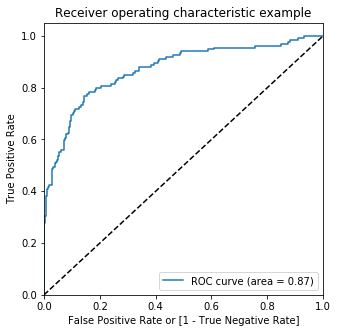

In [69]:
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Probability)

##### The receiving operating characteristic is a measure of classifier performance. Using the proportion of positive data points that are correctly considered as positive and the proportion of negative data points that are mistakenly considered as positive, we generate a graphic that shows the trade off between the rate at which you can correctly predict something with the rate of incorrectly predicting something. Ultimately, we’re concerned about the area under the ROC curve, or AUROC. That metric ranges from 0.50 to 1.00, and values above 0.80 indicate that the model does a good job in discriminating between the two categories which comprise our target variable.

#### Finding Optimal Cutoff Point --> Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Attrition,Attrition_Probability,EmployeeID,predicted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.169396,1383,0,0,1,1,0,0,0,0,0,0,0,0
1,1,0.642386,111,0,0,1,1,1,1,1,1,1,0,0,0
2,0,0.146917,1100,0,0,1,1,0,0,0,0,0,0,0,0
3,0,0.270115,1285,0,0,1,1,1,0,0,0,0,0,0,0
4,0,0.092961,1050,0,0,1,0,0,0,0,0,0,0,0,0


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.165432  1.000000  0.000000
0.1   0.1  0.695062  0.865672  0.661243
0.2   0.2  0.834568  0.768657  0.847633
0.3   0.3  0.866667  0.619403  0.915680
0.4   0.4  0.880247  0.544776  0.946746
0.5   0.5  0.888889  0.470149  0.971893
0.6   0.6  0.895062  0.410448  0.991124
0.7   0.7  0.880247  0.291045  0.997041
0.8   0.8  0.869136  0.208955  1.000000
0.9   0.9  0.848148  0.082090  1.000000


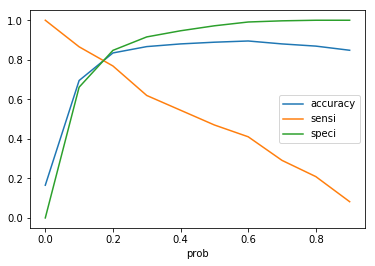

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.2 is the optimum point to take it as a cutoff probability

In [73]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Attrition,Attrition_Probability,EmployeeID,predicted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.169396,1383,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.642386,111,0,0,1,1,1,1,1,1,1,0,0,0,1
2,0,0.146917,1100,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.270115,1285,0,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.092961,1050,0,0,1,0,0,0,0,0,0,0,0,0,0


In [74]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)

0.8691358024691358

In [75]:
#### Accuracy of 86.9 ~ 87% indicates the model can 

In [76]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted )
confusion2

array([[629,  47],
       [ 59,  75]])

In [77]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity is a measure of the percentage of positive subjects which are classified as positive. Specificity is a measure of the percentage of negative subjects which are classified as negative.

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5597014925373134

In [79]:
# Let us calculate specificity - High specificity indicates the model can identify those who will not have attrition will have a negative test result.
TN / float(TN+FP)

0.9304733727810651

#### High specificity of 0.93 (93%) indicates the model can identify those who will not have attrition will have a negative test result.

In [80]:
# Calculate false postive rate - predicting Attrition when Employee is not Attrition
print(FP/ float(TN+FP))

0.0695266272189349


##### Low false posititve rate makes sense, as FPR = 1 - Specificity, So as Specificity is high , FPR is low.

In [81]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6147540983606558


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9142441860465116


##### We find postitive predictive value (PPV) is 61.5% and negative predictive value (NPV) is 91%. 
##### One disadvantage of PPV and NPV is that they depend on the overall success rate in the population. 
##### For example, if attritions are usually predicted right then it is easy to achieve a high PPV by simply classifying every case as successful. 
##### On the other hand, if such cases are very rare then it is hard for even a good model to achieve a high PPV. 
##### Sensitivity and specificity do not have this problem – they do not depend on the overall success rate and as such they may be interpreted in absolute terms as a measure of the classifier’s performance.
##### Despite the aforementioned disadvantage, PPV and NPV can be useful measures when it comes to making individual diagnoses, since they indicate the probabilities of the outcomes given the classification. 
##### For example, the high PPV in our example means that if the classification is “successful” then the attrition is predicted accurately with little concern as there is a high probability of success from the model accuracy.

### Precision and Recall

In [83]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)


[[675   1]
 [105  29]]


In [84]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9666666666666667

In [85]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.21641791044776118

In [86]:
## Using sklearn to calculate above
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Attrition, y_train_pred_final.predicted)

0.9666666666666667

In [87]:
recall_score(y_train_pred_final.Attrition, y_train_pred_final.predicted)

0.21641791044776118

#### Precision and recall tradeoff

In [88]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Attrition, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Probability)

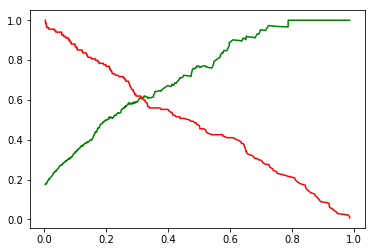

In [89]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Cut-off probability is coming out to be 0.3

### Making predictions on the test set

In [90]:
X_test[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']] = scaler.transform(X_test[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']])
X_test = X_test[col]
X_test.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TrainingTimesLastYear,YearsWithCurrManager,JobRole_Laboratory Technician,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Medical,EducationField_Other,MaritalStatus_Single,BusinessTravel_Travel_Frequently
652,0.179450,1.196459,-1.571634,-0.687147,-0.675966,1.617427,1.198646,-0.640174,2.140316,-0.513469,-0.277719,-0.844081,1.509752,-0.242536,1.402510,-0.47478
1286,0.525258,-0.916835,0.252182,-1.598094,0.573157,-0.618266,1.198646,1.614353,-0.390041,1.947537,-0.277719,1.184720,-0.662360,-0.242536,-0.713008,-0.47478
164,-0.973242,-0.792524,0.252182,0.223801,-0.675966,1.617427,1.198646,-0.640174,-0.751520,-0.513469,-0.277719,-0.844081,1.509752,-0.242536,-0.713008,-0.47478
809,-0.857973,-0.792524,1.164090,-0.687147,-1.092340,-0.618266,-0.672073,0.111335,1.417357,-0.513469,-0.277719,-0.844081,1.509752,-0.242536,-0.713008,-0.47478
811,0.294719,-0.916835,1.164090,-0.687147,1.822280,-0.618266,0.263286,-0.640174,-1.113000,-0.513469,-0.277719,-0.844081,-0.662360,-0.242536,1.402510,-0.47478


In [91]:
X_test.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsWithCurrManager',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'MaritalStatus_Single',
       'BusinessTravel_Travel_Frequently'],
      dtype='object')

In [92]:
X_test_sm = sm.add_constant(X_test)
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

652     0.259436
1286    0.028909
164     0.088045
809     0.003866
811     0.225322
1395    0.295841
663     0.061044
481     0.027424
925     0.262626
461     0.057382
dtype: float64

In [93]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
652,0.259436
1286,0.028909
164,0.088045
809,0.003866
811,0.225322


In [94]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [95]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [96]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [97]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [98]:
y_pred_final.head()

,Attrition,LeadID,0
0,0,652,0.259436
1,0,1286,0.028909
2,0,164,0.088045
3,0,809,0.003866
4,0,811,0.225322


In [99]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Probability'})

In [100]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Attrition','Attrition_Probability'], axis=1)

In [101]:
# Let's see the head of y_pred_final
y_pred_final

,LeadID,Attrition,Attrition_Probability
0,652,0,0.259436
1,1286,0,0.028909
2,164,0,0.088045
3,809,0,0.003866
4,811,0,0.225322
5,1395,1,0.295841
6,663,1,0.061044
7,481,0,0.027424
8,925,0,0.262626
9,461,0,0.057382


In [102]:
y_pred_final['final_predicted'] = y_pred_final.Attrition_Probability.map(lambda x: 1 if x > 0.4 else 0) #0.4 taken from cross over point in plot

In [103]:
y_pred_final.head()

,LeadID,Attrition,Attrition_Probability,final_predicted
0,652,0,0.259436,0
1,1286,0,0.028909,0
2,164,0,0.088045,0
3,809,0,0.003866,0
4,811,0,0.225322,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted)

0.8591954022988506

In [105]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5597014925373134

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.9304733727810651

In [108]:
#calculating Lead Score for the predicted data
y_pred_final['Lead_Score'] = round((y_pred_final.Attrition_Probability*100),0)

In [109]:
y_pred_final.head()

,LeadID,Attrition,Attrition_Probability,final_predicted,Lead_Score
0,652,0,0.259436,0,26.0
1,1286,0,0.028909,0,3.0
2,164,0,0.088045,0,9.0
3,809,0,0.003866,0,0.0
4,811,0,0.225322,0,23.0


In [110]:
#Finding all the Attrition leads from lead Score
AttritionLeads=y_pred_final[y_pred_final.final_predicted==1]
AttritionLeads

,LeadID,Attrition,Attrition_Probability,final_predicted,Lead_Score
10,1262,1,0.515990,1,52.0
11,1036,1,0.551417,1,55.0
12,797,1,0.523250,1,52.0
20,732,1,0.649398,1,65.0
21,841,0,0.532362,1,53.0
31,204,1,0.806057,1,81.0
43,1249,1,0.679746,1,68.0
54,1168,0,0.838498,1,84.0
62,1296,0,0.452851,1,45.0
63,140,1,0.816962,1,82.0


### Above tables shows the employees identified as Attrition Risk with an accuracy of 86% and  specificity of 93%

####### The factors that influence whether an employee with be Attrition Risk or Not as as follows: 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction','NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction','TrainingTimesLastYear', 'YearsWithCurrManager','JobRole_Laboratory Technician', 'JobRole_Sales Representative','EducationField_Life Sciences', 'EducationField_Medical','EducationField_Other', 'MaritalStatus_Single','BusinessTravel_Travel_Frequently'